In [1]:
# Уровень 0:
# Даны вектора x=(1,1), y=(2, 0) и z = (0,2)
# Надо:
# Изобразить вектора на экране
# Изобразить точку x + y + z
# Найти угол между векторами x и y

# Уровень 1:
# Даны дома из Бостона
# Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)
# Написать код разложения дома по указанному базису

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Изобразить вектора на экране

In [85]:
x = (1,1)
y = (2,0)
z = (0,2)

In [87]:
v = np.array([x,y,z])

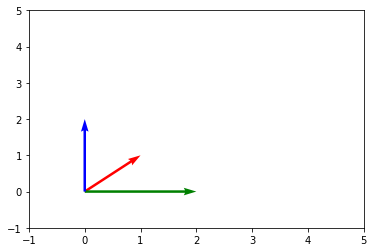

In [91]:
U, V = zip(*v)
plt.figure()
ax = plt.gca()
ax.quiver([0,0,0], [0,0,0], U, V, angles='xy', scale_units='xy', color=['r','g','b'], scale=1)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
plt.draw()
plt.show()

# Изобразить точку x + y + z

In [97]:
j = np.array(x) + np.array(y) + np.array(z)

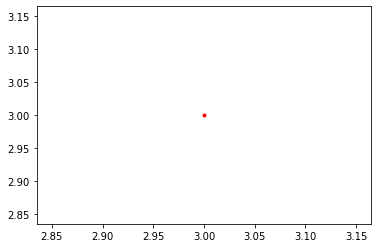

In [103]:
plt.plot(*j, marker='o', markersize=3, color="red")

# Найти угол между векторами x и y

In [118]:
xv = np.array(x)
yv = np.array(y)

In [119]:
xv_yv_dot = np.dot(xv, yv)

In [120]:
leghth_xv = np.sqrt(np.dot(xv, xv))
leghth_yv = np.sqrt(np.dot(yv, yv))

In [130]:
cos_xy = xv_yv_dot / (leghth_xv * leghth_yv)

In [137]:
acos_xy = np.arccos( cos_xy  ) * 360 / 2 / np.pi

In [139]:
print(f'Угол между векторами x и y равен: {acos_xy} градусов')

Угол между векторами x и y равен: 45.00000000000001 градусов


In [ ]:
# Уровень 1:
# Даны дома из Бостона
# Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)
# Написать код разложения дома по указанному базису

# Даны дома из Бостона

In [153]:
import pandas as pd

In [154]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Основные значения:

    CRIM: This is the per capita crime rate by town
    ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
    INDUS: This is the proportion of non-retail business acres per town.
    CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
    NOX: This is the nitric oxides concentration (parts per 10 million)
    RM: This is the average number of rooms per dwelling
    AGE: This is the proportion of owner-occupied units built prior to 1940
    DIS: This is the weighted distances to five Boston employment centers
    RAD: This is the index of accessibility to radial highways
    TAX: This is the full-value property-tax rate per 10,000 dollars
    PTRATIO: This is the pupil-teacher ratio by town
    B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
    LSTAT: This is the percentage lower status of the population
    MEDV: This is the median value of owner-occupied homes in 1000 dollars



# Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)

In [155]:
data = data.drop("MEDV", axis=1)

In [160]:
sample = data.sample(50)

In [161]:
sample.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307.0,21.0,376.57,21.02
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09
38,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666.0,20.2,50.92,18.13
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58


# Написать код разложения дома по указанному базису

In [168]:
#как вариант векторизации числовых данных
sample.to_numpy()

array([[1.25179e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.57000e+00, 9.81000e+01, 3.79790e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.76570e+02, 2.10200e+01],
       [1.31170e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.20000e-01,
        6.12700e+00, 8.52000e+01, 2.12240e+00, 5.00000e+00, 3.84000e+02,
        2.09000e+01, 3.87690e+02, 1.40900e+01],
       [1.75050e-01, 0.00000e+00, 5.96000e+00, 0.00000e+00, 4.99000e-01,
        5.96600e+00, 3.02000e+01, 3.84730e+00, 5.00000e+00, 2.79000e+02,
        1.92000e+01, 3.93430e+02, 1.01300e+01],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.52500e+00, 8.65000e+01, 2.43580e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 5.09200e+01, 1.81300e+01],
       [1.05393e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.93500e+00, 2.93000e+01, 4.49860e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.86850e+02, 6.58000e+00],
       [1.15779e+01, 0.00000e+